In [1]:
import sys
sys.path.append('../transformers/')

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from tqdm import tqdm

from path_explain import utils
from plot.text import text_plot, matrix_interaction_plot, bar_interaction_plot
from model import cnn_model

from embedding_explainer import EmbeddingExplainerTF

In [3]:
utils.set_up_environment(visible_devices='3')

In [4]:
encoder = tfds.features.text.TokenTextEncoder.load_from_file('encoder')

In [5]:
model = tf.keras.models.load_model('model.h5')

In [6]:
interpret_model = cnn_model(encoder.vocab_size, for_interpretation=True)

In [7]:
interpret_model.load_weights('model.h5', by_name=True)

In [8]:
sentences = [
    'This movie was bad',
    'This movie was not bad',
    'A movie',
    'A bad movie',
    'A bad, terrible movie',
    'A bad, terrible, awful movie',
    'A bad, terrible, awful, horrible movie'
]

ids_list = []
for sentence in sentences:
    ids = encoder.encode(sentence)
    ids = np.array(ids)
    ids = np.pad(ids, pad_width=(0, max(0, 52 - len(ids))))
    ids_list.append(ids)
ids_list = np.stack(ids_list, axis=0)

In [9]:
model(ids_list)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[0.05548102],
       [0.02436904],
       [0.54755235],
       [0.02286368],
       [0.00701833],
       [0.00253859],
       [0.00068946]], dtype=float32)>

In [9]:
embedding_model = tf.keras.models.Model(model.input, model.layers[1].output)

In [10]:
embeddings = embedding_model(ids_list)

In [11]:
baseline_embedding = embedding_model(np.zeros((1, 52), dtype=np.float32))

In [12]:
explainer = EmbeddingExplainerTF(interpret_model)

In [13]:
attributions = explainer.attributions(inputs=embeddings,
                                      baseline=baseline_embedding,
                                      batch_size=128,
                                      num_samples=256,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 7/7 [00:00<00:00, 34.89it/s]


In [14]:
interactions = explainer.interactions(inputs=embeddings,
                                      baseline=baseline_embedding,
                                      batch_size=128,
                                      num_samples=256,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 7/7 [00:18<00:00,  2.66s/it]


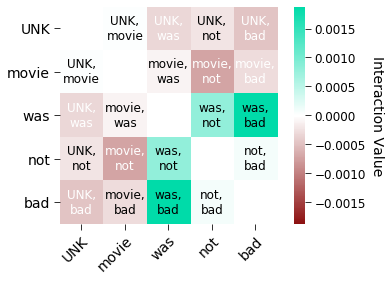

In [24]:
i = 1
matrix_interaction_plot(interactions[i, ids_list[i] != 0][:, :5], encoder.decode(ids_list[i]).split(' '))
plt.savefig('not_bad_cnn_matrix.pdf')

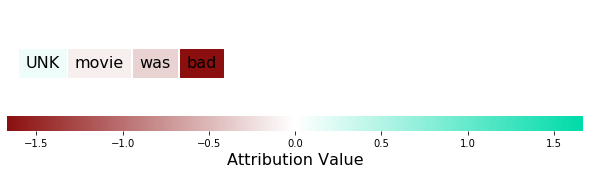

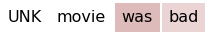

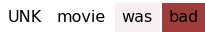

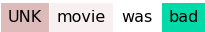

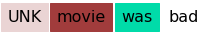

In [47]:
plot_all(0)

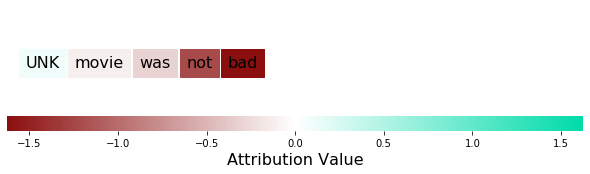

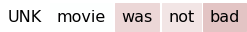

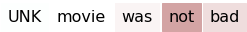

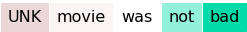

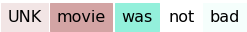

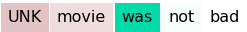

In [48]:
plot_all(1)

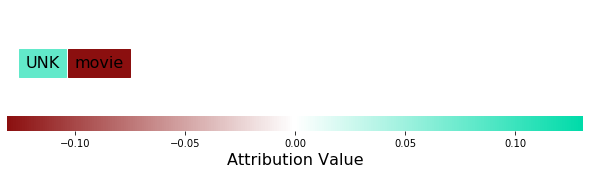

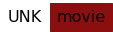

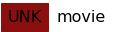

In [49]:
plot_all(2)

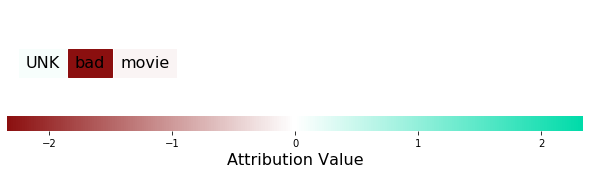

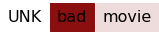

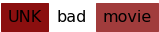

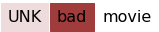

In [50]:
plot_all(3)

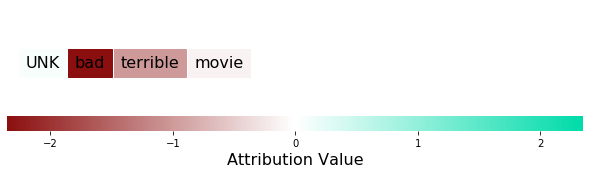

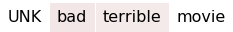

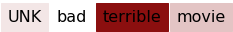

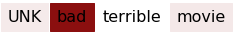

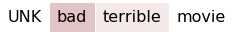

In [51]:
plot_all(4)

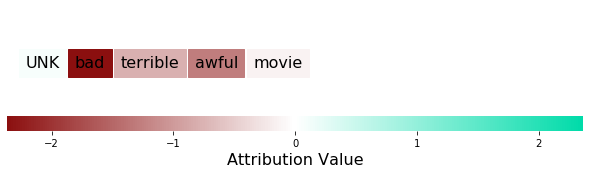

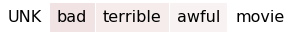

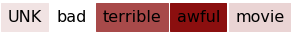

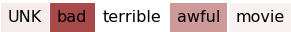

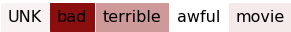

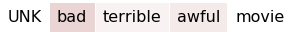

In [53]:
plot_all(5)

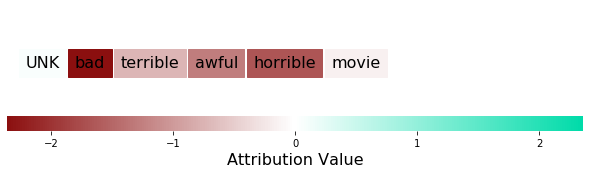

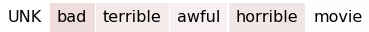

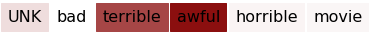

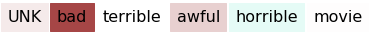

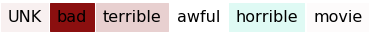

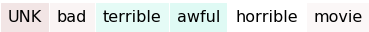

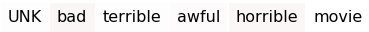

In [56]:
plot_all(6)